In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

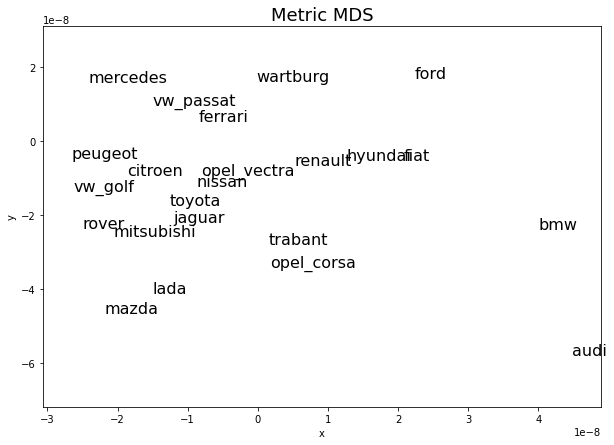

In [2]:
cardat = pd.read_csv("carmean2.dat", sep = "\s+", header=None)
car = cardat.iloc[:, 1:]

car.columns = ["economic", "service", "value", "price", "look", "sporty", 
               "security", "easy"]

marks = ["audi", "bmw", "citroen", "ferrari", "fiat", "ford", "hyundai",
         "jaguar", "lada", "mazda", "mercedes", "mitsubishi", "nissan", 
         "opel_corsa", "opel_vectra", "peugeot", "renault", "rover", "toyota", 
         "trabant", "vw_golf", "vw_passat", "wartburg"]

dist = np.zeros([len(car), len(car)])

for i in range(0, len(car)):
    for j in range(0, len(car)):
        dist[i, j] = np.linalg.norm(car.values[i, :] - car.values[j, :])
        
dist2 = dist**2
d = np.mean(dist2, axis = 0)
B = 0.5 * ((dist2 - d).T - d + np.mean(d))

e = np.linalg.eigh(B)
eva = e[0]
eve = e[1][:, -2:]
sq  = np.reshape(np.tile(np.sqrt(eva[-2:]), len(eva)), (len(eva), len(eve.T)))

q = eve * sq
corr = pd.DataFrame(np.hstack((q, car))).corr()
r = corr.iloc[2:len(corr.T), :2]


fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(q[:, 0], q[:, 1], c = "w")
for i in range(len(marks)):
    ax.text(q[i, 0], q[i, 1], marks[i], fontsize = 16)

plt.xlim(min(q[:, 0]) - abs(np.mean(q[:, 0])), max(q[:, 0]) + abs(np.mean(q[:, 0])))
plt.ylim(min(q[:, 1]) - abs(np.mean(q[:, 1])), max(q[:, 1]) + abs(np.mean(q[:, 1])))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Metric MDS", fontsize = 18)
plt.show()

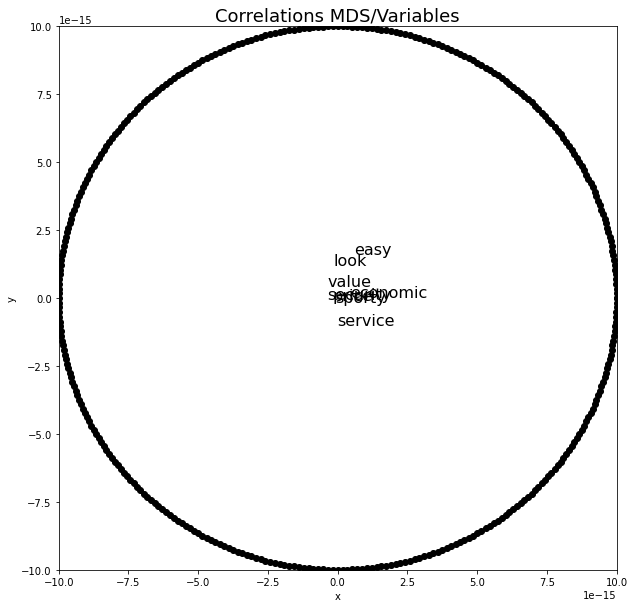

In [3]:
grid = [c/180 * np.pi for c in range(0, 361)]

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(np.cos(grid)/10e+13, np.sin(grid)/10e+13, c = "k")
for i in range(len(car.columns)):
    ax.text(r.iloc[i, 0], r.iloc[i, 1], car.columns[i], fontsize = 16)
    
plt.xlim(min(np.cos(grid)/10e+13), max(np.cos(grid)/10e+13))
plt.ylim(min(np.sin(grid)/10e+13), max(np.sin(grid)/10e+13))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Correlations MDS/Variables", fontsize = 18)
plt.show()